<a href="https://colab.research.google.com/github/swarnajyoti/NBA_PlayerPosition_StatAnalysis/blob/master/NBA_Player.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Who is the best/worst NBA player, per draft position? 

Best/worst player is mainly about opinion and preference, and stats cannot simply justified the best/worst argument as basketball and sports in overall cannot be judged only by stats and number, so it's a controversial topic. 

Let's get started into it. For you who don't know what a draft is, it is a method for NBA teams to "recruit" new players from colleges or overseas. The recruitment process happened sequentially, so the team that get the first pick can recruit player first, and so on. With such method, it is expected that the first player drafted is the best player from the recruitment class. But sometimes, we got a highly picked player that doesn't meet the expectation or a lowly drafted player that overcome the expectation. Using this dataset, I will try to analyze which player that actually over/underacieved their draft position.

In [1]:
# Link your google drive with colab workspace
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
import sys
datapath = '/content/drive/My Drive/Python/NBA Player/all_seasons.csv'  # You might need to adjust the path depending on how you setup your google drive!!
sys.path.insert(1, datapath)

## Exploratory Data Analytics, Data Cleaning

In [65]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [10, 9]
#%matplotlib inline

In [9]:
df = pd.read_csv(datapath)
df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,11140,Maxi Kleber,DAL,28.0,208.28,108.862080,None,Germany,Undrafted,Undrafted,Undrafted,63,9.1,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-20
11141,11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,2,35,15,1.2,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-20
11142,11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,1,11,49,6.1,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-20
11143,11143,Norvel Pelle,PHI,27.0,208.28,104.779752,None,USA,Undrafted,Undrafted,Undrafted,20,2.1,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-20


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11145 non-null  int64  
 1   player_name        11145 non-null  object 
 2   team_abbreviation  11145 non-null  object 
 3   age                11145 non-null  float64
 4   player_height      11145 non-null  float64
 5   player_weight      11145 non-null  float64
 6   college            11145 non-null  object 
 7   country            11145 non-null  object 
 8   draft_year         11145 non-null  object 
 9   draft_round        11145 non-null  object 
 10  draft_number       11145 non-null  object 
 11  gp                 11145 non-null  int64  
 12  pts                11145 non-null  float64
 13  reb                11145 non-null  float64
 14  ast                11145 non-null  float64
 15  net_rating         11145 non-null  float64
 16  oreb_pct           111

In [21]:
df.describe()

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000
mean,5572.000000,27.168686,200.812818,100.637868,52.005832,8.126487,3.560036,1.801463,-2.153899,0.055593,0.141772,0.185599,0.508099,0.131078
std,3217.428709,4.344164,9.190973,12.576295,25.069495,5.935482,2.495394,1.789940,12.150611,0.043889,0.063194,0.053047,0.098879,0.095017
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2786.000000,24.000000,195.580000,90.718400,32.000000,3.500000,1.800000,0.600000,-6.300000,0.022000,0.096000,0.150000,0.478000,0.065000
50%,5572.000000,27.000000,200.660000,99.790240,58.000000,6.600000,3.000000,1.200000,-1.300000,0.043000,0.132000,0.182000,0.521000,0.102000
75%,8358.000000,30.000000,208.280000,109.315672,74.000000,11.500000,4.700000,2.400000,3.200000,0.086000,0.182000,0.218000,0.557000,0.178000
max,11144.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


### Display the number of rows and columns in the database.

In [12]:
df.shape

(11145, 22)

### Display Bruce Bowen's point averages for each of his seasons in the database

In [14]:
df.loc[df.player_name == 'Bruce Bowen', ['player_name', 'pts', 'season']]

,player_name,pts,season
163,Bruce Bowen,0.0,1996-97
769,Bruce Bowen,5.6,1997-98
882,Bruce Bowen,2.3,1998-99
1513,Bruce Bowen,2.8,1999-00
1892,Bruce Bowen,7.6,2000-01
2502,Bruce Bowen,7.0,2001-02
2690,Bruce Bowen,7.1,2002-03
3342,Bruce Bowen,6.9,2003-04
3763,Bruce Bowen,8.2,2004-05
4215,Bruce Bowen,7.5,2005-06


### List all the rows for Spanish players

In [15]:
df.query("country == 'Spain'")

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
2235,2235,Pau Gasol,MEM,21.0,213.36,102.965384,None,Spain,2001,1,3,82,17.6,8.9,2.7,-6.2,0.089,0.182,0.226,0.566,0.133,2001-02
3026,3026,Pau Gasol,MEM,22.0,213.36,102.965384,None,Spain,2001,1,3,82,19.0,8.8,2.8,-2.6,0.074,0.197,0.239,0.570,0.131,2002-03
3105,3105,Pau Gasol,MEM,23.0,213.36,108.862080,None,Spain,2001,1,3,78,17.7,7.7,2.5,2.3,0.095,0.180,0.267,0.542,0.143,2003-04
3253,3253,Raul Lopez,UTA,24.0,182.88,72.574720,None,Spain,2001,1,24,82,7.0,1.9,3.7,-2.2,0.019,0.100,0.215,0.503,0.364,2003-04
3540,3540,Pau Gasol,MEM,24.0,213.36,108.862080,None,Spain,2001,1,3,56,17.8,7.3,2.4,4.1,0.089,0.183,0.260,0.582,0.143,2004-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10621,10621,Alex Abrines,OKC,25.0,198.12,90.718400,None,Spain,2013,2,32,31,5.3,1.5,0.6,1.6,0.007,0.067,0.120,0.507,0.047,2018-19
10944,10944,Ricky Rubio,PHX,29.0,190.50,86.182480,None,Spain,2009,1,5,55,12.7,4.5,8.8,4.1,0.024,0.118,0.196,0.522,0.375,2019-20
10971,10971,Willy Hernangomez,CHA,25.0,210.82,113.398000,None,Spain,2015,2,35,31,6.1,4.3,0.9,-2.6,0.105,0.243,0.222,0.576,0.136,2019-20
11056,11056,Juancho Hernangomez,MIN,24.0,205.74,97.068688,None,Spain,2016,1,15,46,5.8,3.9,0.8,-2.4,0.047,0.178,0.150,0.514,0.066,2019-20


### Calculate the average assists per season for Chris Paul

In [16]:
df.loc[df.player_name == 'Chris Paul'].ast.mean()

9.440000000000001

In [17]:
grouped = df.groupby(['player_name', 'season'])
grouped.first()

Unnamed: 0 team_abbreviation  ...  ts_pct  ast_pct
player_name        season                                 ...                 
A.C. Green         1996-97         138               DAL  ...   0.523    0.045
                   1997-98         800               DAL  ...   0.496    0.074
                   1998-99        1054               DAL  ...   0.441    0.043
                   1999-00        1319               LAL  ...   0.482    0.058
                   2000-01        1948               MIA  ...   0.492    0.050
...                                ...               ...  ...     ...      ...
Zydrunas Ilgauskas 2007-08        5250               CLE  ...   0.522    0.082
                   2008-09        5696               CLE  ...   0.523    0.060
                   2009-10        6085               CLE  ...   0.491    0.058
                   2010-11        6676               MIA  ...   0.531    0.033
Zylan Cheatham     2019-20       10980               NOP  ...   0.400    0.133

[11141 rows x 20 columns]

### For each player, determine the number of seasons they have played since 1996

In [18]:
seasons_played = df.player_name.value_counts()
seasons_played

Vince Carter         22
Dirk Nowitzki        21
Kobe Bryant          20
Kevin Garnett        20
Tyson Chandler       19
                     ..
Robert Whaley         1
Thomas Welsh          1
Kyle Collinsworth     1
Dairis Bertans        1
Deng Adel             1
Name: player_name, Length: 2235, dtype: int64

### Plot Bruce Bowen's average points per season

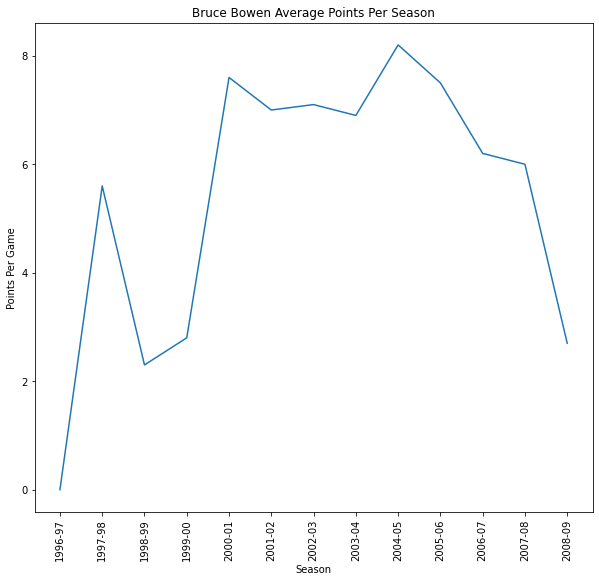

In [66]:
bruce_statistics = df.loc[df.player_name == 'Bruce Bowen', ['pts','season']]
plt.plot(bruce_statistics["season"], bruce_statistics["pts"])
plt.ylabel('Points Per Game')
plt.xticks(rotation=90)
plt.title("Bruce Bowen Average Points Per Season")
plt.xlabel('Season')
#plt.figure(figsize=(30,10))
#plt.figure(figsize=(16,16))
#plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.show()

### Plot Kobe Bryant's average points per season

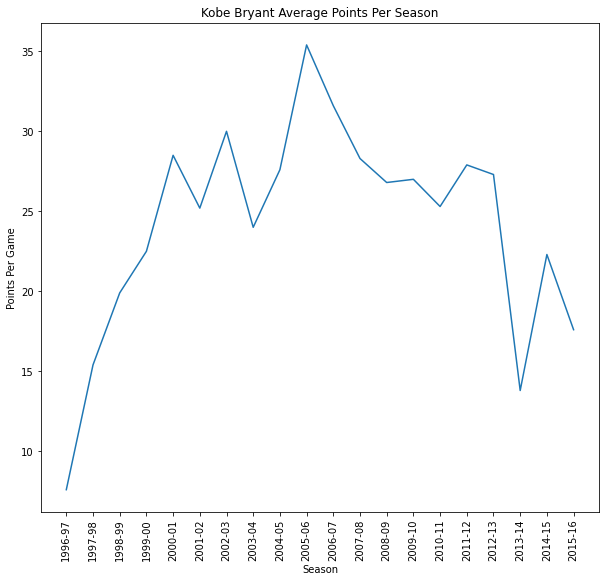

In [67]:
kobe_statistics = df.loc[df.player_name == 'Kobe Bryant', ['pts','season']]
plt.plot(kobe_statistics["season"], kobe_statistics["pts"])
plt.ylabel('Points Per Game')
plt.xticks(rotation=90)
plt.title("Kobe Bryant Average Points Per Season")
plt.xlabel('Season')
plt.show()

In [22]:
df.describe()

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000
mean,5572.000000,27.168686,200.812818,100.637868,52.005832,8.126487,3.560036,1.801463,-2.153899,0.055593,0.141772,0.185599,0.508099,0.131078
std,3217.428709,4.344164,9.190973,12.576295,25.069495,5.935482,2.495394,1.789940,12.150611,0.043889,0.063194,0.053047,0.098879,0.095017
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2786.000000,24.000000,195.580000,90.718400,32.000000,3.500000,1.800000,0.600000,-6.300000,0.022000,0.096000,0.150000,0.478000,0.065000
50%,5572.000000,27.000000,200.660000,99.790240,58.000000,6.600000,3.000000,1.200000,-1.300000,0.043000,0.132000,0.182000,0.521000,0.102000
75%,8358.000000,30.000000,208.280000,109.315672,74.000000,11.500000,4.700000,2.400000,3.200000,0.086000,0.182000,0.218000,0.557000,0.178000
max,11144.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


Here we got some descriptive statistics of numerical features. We can see that the dataset contain many single game appearence. While this not really affect many of the essential stats (points, assists, rebounds, etc.), single game appearence really disturb the net rating. For example, the max net rating recorded in the dataset is 300 while the lowest is -200. This is happens because in one of those single game appearence, that player maybe only played in garbage time thus the net rating deflated.

To deal with this, we can use three approaches: drop the record of player who only played few number of games for every season, drop the record of player who only averaged few number of games overall, or simply removed this features from consideration. All of this approaches have their own pros and cons. In the first approach, we can drop some record of a player who actually has a decent career, but has one or two seasons with only one appearances due to injury/rough start. For example, let's see the career of Kobe Bryant:

In [23]:
test_feat = ['gp','net_rating']
df.loc[df.player_name=='Kobe Bryant',test_feat]

,gp,net_rating
342,71,2.2
536,79,6.9
1098,50,2.8
1649,66,10.4
2079,68,6.3
2279,80,7.6
3011,82,3.7
3128,65,6.2
3570,66,-2.2
4083,80,4.7


Here we can see that Kobe start his first NBA season by only played one game with deflated net rating of 300, but after that he definitely has a legendary career with the San Antonio Spurs. If we choose the first approach, we will neglect his career start, but we can slightly alter his points per game for example, and can create some bias. If we choose the second approach, we will keep this deflated stats and affect our calculation. The third approach is more neutral, but I want to keep it as it can differentiate good player in good team or bad team.

To decide my approach, I want to know how many records that contain this anomaly:

In [24]:
(df.loc[(df['gp']==1 )& (df['net_rating']>20)])

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
163,163,Bruce Bowen,MIA,26.0,200.66,90.718400,Cal State-Fullerton,USA,Undrafted,Undrafted,Undrafted,1,0.0,0.0,0.0,300.0,0.000,0.000,0.000,0.000,0.000,1996-97
1008,1008,Tyson Wheeler,DEN,23.0,177.80,74.842680,Rhode Island,USA,1998,2,47,1,4.0,0.0,2.0,62.2,0.000,0.000,0.320,1.064,0.667,1998-99
1687,1687,Mario Bennett,LAC,26.0,198.12,106.594120,Arizona State,USA,1995,1,27,1,0.0,2.0,0.0,32.7,0.143,0.250,0.276,0.000,0.000,1999-00
1725,1725,Randell Jackson,DAL,24.0,210.82,97.522280,Florida State,USA,1999,Undrafted,Undrafted,1,0.0,0.0,0.0,60.4,0.000,0.000,0.000,0.000,0.000,1999-00
1788,1788,David Wingate,SEA,37.0,195.58,84.821704,Georgetown,USA,1986,2,44,1,6.0,0.0,2.0,70.6,0.000,0.000,0.140,1.000,0.286,2000-01
2651,2651,Chris Owens,MEM,24.0,200.66,111.130040,Texas,USA,2002,2,47,1,4.0,1.0,0.0,39.1,0.333,0.000,0.288,0.667,0.000,2002-03
4226,4226,Bryon Russell,DEN,35.0,200.66,102.058200,Long Beach State,USA,1993,2,45,1,0.0,1.0,1.0,60.0,0.000,0.500,0.000,0.000,0.333,2005-06
4710,4710,Renaldo Major,GSW,25.0,200.66,86.182480,Fresno State,USA,Undrafted,Undrafted,Undrafted,1,5.0,2.0,0.0,21.5,0.000,0.091,0.171,0.230,0.000,2006-07
4733,4733,Von Wafer,LAC,21.0,195.58,95.254320,Florida State,USA,2005,2,39,1,0.0,0.0,0.0,26.6,0.000,0.000,0.275,0.000,0.000,2006-07
5738,5738,Steven Hill,OKC,23.0,213.36,111.130040,Arkansas,USA,Undrafted,Undrafted,Undrafted,1,2.0,3.0,0.0,79.0,0.400,0.500,0.101,1.000,0.000,2008-09


It seems like there are many similar cases in the dataset. Therefore, my approach is to discard player who average less than 3 games for their entire career when we rank the players.

Then as we want to measure per draft number, we want to know how many draft class are there in the dataset

In [25]:
df.draft_year.unique()

array(['1986', '1990', '1979', '1995', '1985', '1981', '1994', '1992',
       '1991', 'Undrafted', '1983', '1988', '1996', '1993', '1989',
       '1987', '1982', '1984', '1980', '1976', '1978', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '1963', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019'], dtype=object)

So, per 1996 season, there are 44 draft class and 1 class for undrafted player. In the case for undrafted player, we want to see whether majority of NBA players are undrafted. Since 1990, NBA draft consist of two rounds with 29 or 30 picks per round. thus around 60 new players become NBA player each season. If each team need 15-man roster for their team, for 30 NBA team around 450 players needed, which can be acquired from free agency of undrafted player. For some perspective, let's see 2017 season

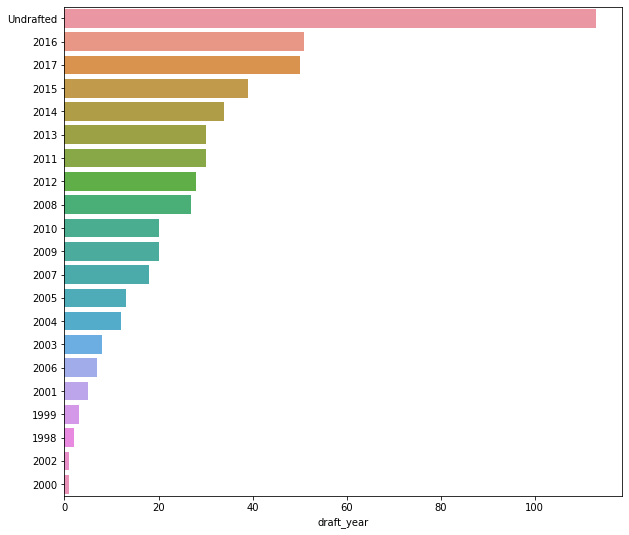

In [68]:
sns.barplot(y=df.loc[df.season=='2017-18'].draft_year.value_counts().index,x=df.loc[df.season=='2018-19'].draft_year.value_counts())

In [27]:
total_player = len(df.loc[df.season=='2017-18'].player_name.unique())
undrafted_player = len(df.loc[(df.season=='2018-19')&(df.draft_year=='Undrafted')].player_name.unique())
prcntg  = 100*(undrafted_player/total_player)
print(prcntg)

23.88888888888889


We can see that almost 24% of NBA players actually come undrafted per 2017 season.

This dataset contains all of player records from 1996 season. We can't include all players in this list, as some of them maybe drafted far back beyond 1996 season, thus the record in this dataset does not count all of their accomplishment. For example, we only got around 5 season of Michael Jordan greatness with this dataset. Because of that, we need to discard players that drafted before 1995 season. Why 1995 season and not 1996? Because of my personal reference to include recent HOF Kevin Garnett in our analysis, so don't be mad.

In [28]:
df.drop(df[df.draft_year<'1995'].index, inplace=True)

We also need to clean some weird number, such as a player that drafted in 82nd pick, and turn all of undrafted player to 61st pick for analytics purpose. Then we want to discard some players that only played few games for their entire career. First we need to list them then drop them from the original dataframe

In [29]:
df['draft_number'].replace('Undrafted','82',inplace=True)
df['draft_number'].replace('82','61',inplace=True)
df['draft_number'] = pd.to_numeric(df['draft_number'])
df_player = df[['player_name','gp']].groupby('player_name').sum().reset_index()
df_player = df_player.loc[df_player['gp'] < 5]
for p in df_player['player_name']:
    df.drop(df[df.player_name==p].index, inplace=True)

Next, we create two dataframe: average stats per draft pick and average stats per player. Average stats per draft pick means the average stats for each draft pick. For stat, we will used 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct'.

In [30]:
stats = ['gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']
avg_per_pick = df.groupby(['draft_number'])[stats].mean().reset_index()
avg_per_player = df.groupby(['player_name','draft_number'])[stats].mean().reset_index()

First, let's see the trend of traditional stats (points, assists, rebounds) against the draft position

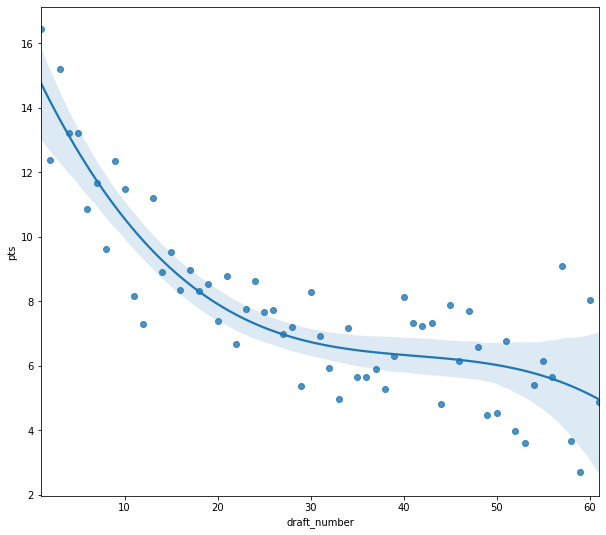

In [69]:
sns.regplot(x='draft_number',y='pts',data=avg_per_pick,order=3)
plt.show()

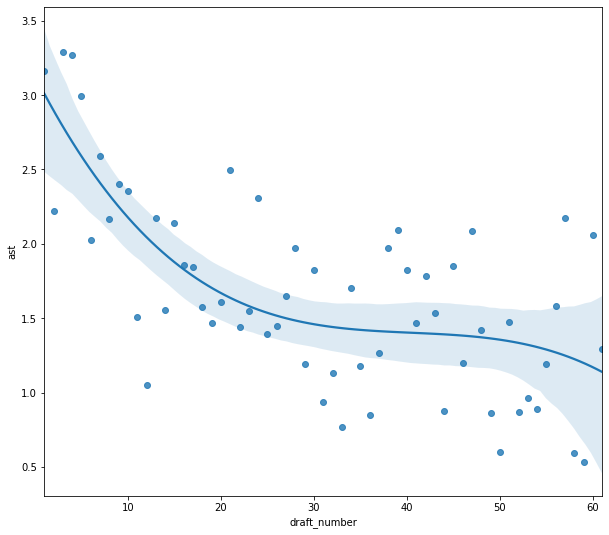

In [70]:
sns.regplot(x='draft_number',y='ast',data=avg_per_pick,order=3)
plt.show()

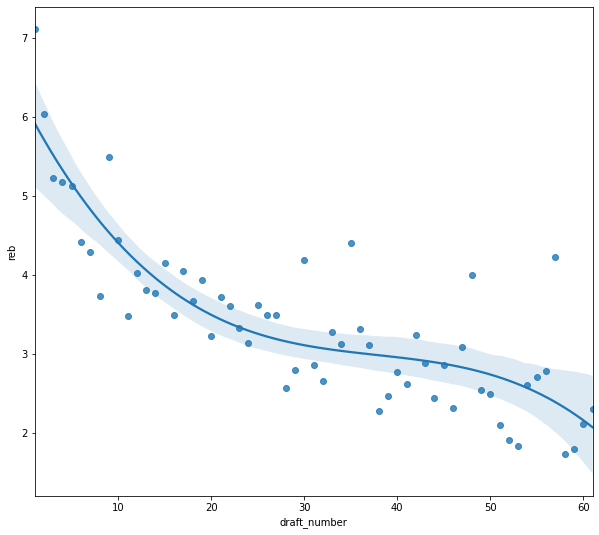

In [71]:
sns.regplot(x='draft_number',y='reb',data=avg_per_pick,order=3)
plt.show()

It's seems that the overall trend shows that higher draft pick gives better number. But let's see the the actual number as we can see many outliers in the graph

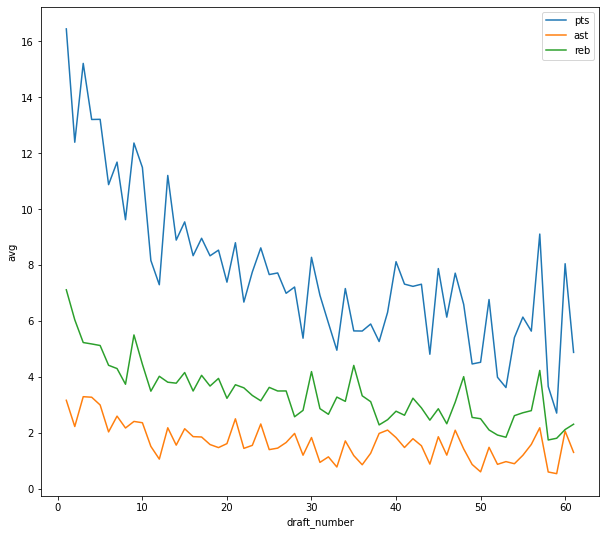

In [72]:
ax = sns.lineplot(x='draft_number',y='pts',data=avg_per_pick, label='pts')
ax = sns.lineplot(x='draft_number',y='ast',data=avg_per_pick, label='ast')
ax = sns.lineplot(x='draft_number',y='reb',data=avg_per_pick, label='reb')
ax.set(ylabel = 'avg')
ax.legend()
plt.show()

In [35]:
avg_per_pick[['draft_number','pts','reb','ast']][:15]

,draft_number,pts,reb,ast
0,1,16.445417,7.110833,3.158333
1,2,12.390541,6.038739,2.219820
2,3,15.210549,5.224051,3.286920
3,4,13.204167,5.173750,3.267917
4,5,13.210040,5.118474,2.990763
5,6,10.873054,4.410180,2.026946
6,7,11.679399,4.293562,2.591416
7,8,9.618932,3.732039,2.166990
8,9,12.362150,5.496262,2.401869
9,10,11.487391,4.445652,2.355217


In [36]:
avg_per_pick[['draft_number','pts','reb','ast']][-5:]

,draft_number,pts,reb,ast
56,57,9.105405,4.227027,2.175676
57,58,3.651724,1.737931,0.593103
58,59,2.700000,1.800000,0.533333
59,60,8.044000,2.112000,2.056000
60,61,4.872002,2.302008,1.294791


We can see some interesting trend here. For example, we can see that the 2nd overall pick actually has lowest ppg and apg among the top 5 picks. Well, historically not many successful 2nd pick since 1995 with some notable names are Derrick Williams, Hasheem Thabeet, and Darko Milicic, which are considered as the draft bust. Then we got 11th pick, which notoriously has lowest ppg, apg, and rpg among lottery pick and even to late round pick. Sure Klay Thompson, Myles Turner, and Domantas Sabonis were picked at this position, but other than that we only got some decent NBA players.

We also got interesting things in the late draft pick, where there are some spike in 57th and 60th pick. Let's see some details about players in this position

In [37]:
avg_per_player[avg_per_player.draft_number==57]

,player_name,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
317,Corsley Edwards,57,10.000000,2.700000,2.500000,0.300000,-14.600000,0.112000,0.149000,0.166000,0.372000,0.057000
509,Drew Barry,57,20.000000,2.300000,1.100000,1.866667,2.266667,0.014667,0.100000,0.125333,0.570667,0.275000
896,Jordan Bone,57,10.000000,1.200000,0.400000,0.800000,-2.900000,0.000000,0.091000,0.171000,0.300000,0.235000
998,Kevin Hervey,57,7.000000,0.300000,0.300000,0.100000,-13.300000,0.000000,0.100000,0.220000,0.091000,0.100000
1130,Manu Ginobili,57,66.062500,13.150000,3.481250,3.781250,10.225000,0.029313,0.127000,0.236563,0.580875,0.238313
1135,Marcin Gortat,57,67.166667,9.183333,7.458333,1.058333,0.816667,0.105167,0.247917,0.169500,0.566250,0.067167
1501,Ryan Reid,57,5.000000,1.600000,0.400000,0.000000,15.000000,0.071000,0.077000,0.163000,0.800000,0.000000
1667,Torraye Braggs,57,11.000000,1.800000,2.150000,0.250000,-5.750000,0.262500,0.227000,0.183000,0.475500,0.041500


In [38]:
avg_per_player[avg_per_player.draft_number==60]

,player_name,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
37,Alex Acker,60,15.000000,2.350000,1.000000,0.650000,-21.300000,0.039000,0.115000,0.215500,0.364500,0.140500
321,Cory Jefferson,60,29.000000,3.250000,2.450000,0.150000,-1.700000,0.111500,0.198000,0.191500,0.463000,0.023500
684,Isaiah Thomas,60,58.333333,16.522222,2.266667,4.566667,-1.822222,0.019778,0.069000,0.263778,0.551667,0.264667
1028,Kostas Antetokounmpo,60,2.500000,0.500000,0.400000,0.150000,0.450000,0.000000,0.222000,0.120000,0.105000,0.083500
1450,Robert Sacre,60,47.250000,3.700000,2.850000,0.600000,-6.800000,0.076500,0.147750,0.144250,0.460750,0.066250
1532,Semih Erden,60,34.500000,3.750000,2.750000,0.400000,-6.400000,0.074500,0.183000,0.142500,0.565500,0.051500
1714,Tyrone Wallace,60,35.333333,5.366667,2.233333,1.333333,-2.033333,0.023333,0.108333,0.162333,0.452000,0.109333
1756,Will Blalock,60,14.000000,1.800000,1.100000,1.200000,-6.700000,0.038000,0.066000,0.120000,0.383000,0.193000


So, we can see two names that create this spike: Manu Ginobili and Isaiah Thomas. IT create the spike in ppg due to his inprobable all-star form in Boston Celtics and Manu just being Manu. Seeing the downhill of IT is a sad story though

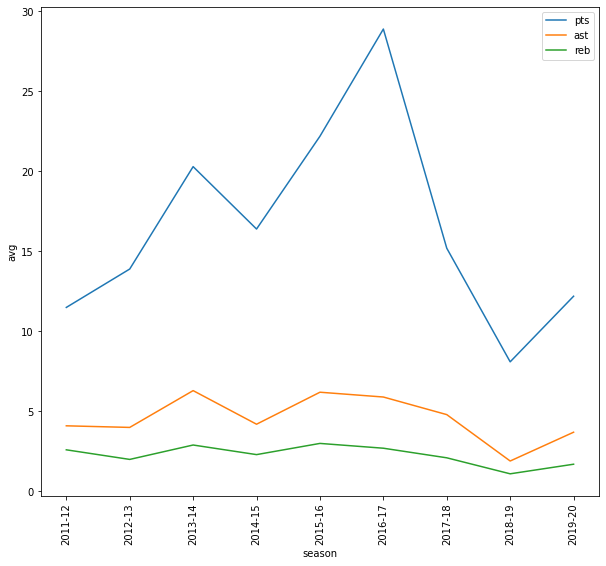

In [73]:
ax = sns.lineplot(x='season',y='pts',data=df.loc[df['player_name'] == 'Isaiah Thomas'], label='pts')
ax = sns.lineplot(x='season',y='ast',data=df.loc[df['player_name'] == 'Isaiah Thomas'], label='ast')
ax = sns.lineplot(x='season',y='reb',data=df.loc[df['player_name'] == 'Isaiah Thomas'], label='reb')
ax.set(ylabel = 'avg')
plt.xticks(rotation=90)
ax.legend()
plt.show()

Although his apg and rpg basically stays the same, his ppg drop significantly from almost 30.0 ppg to mere 10.0 ppg since his trade to Cavs and hip injury.

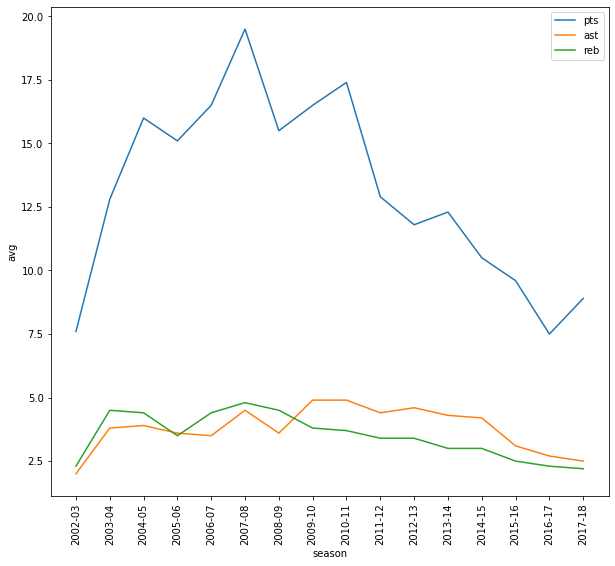

In [74]:
ax = sns.lineplot(x='season',y='pts',data=df.loc[df['player_name'] == 'Manu Ginobili'], label='pts')
ax = sns.lineplot(x='season',y='ast',data=df.loc[df['player_name'] == 'Manu Ginobili'], label='ast')
ax = sns.lineplot(x='season',y='reb',data=df.loc[df['player_name'] == 'Manu Ginobili'], label='reb')
ax.set(ylabel = 'avg')
plt.xticks(rotation=90)
ax.legend()
plt.show()

Manu's stat actually looks like a decent player with some all star number in his prime, given the facts that he was picked 57th in the draft.

# Rank the best player for each pick
Now we move to the tricky part: rank the best/worst player. Obviously we cannot use traditional stats only to make our consideration. We must use all the stats available to rank the players. How do we do it?

I create a metrics called 'score', which measure the difference between sum of player's stat with the average stat in his draft position. Sounds simple right? I create this metrics based on the facts that in basketball stat that we analyzed, the higher the number, the better the player was. In other hands, if the difference of sum of player stats to the sum of average stat is equal/approaching zero, the player is an average player in his draft position. if the difference is positive, he is overachieving and vice versa. First let's create the function to measure the 'score'

In [43]:
def score(a, b):
    #function to calculate score
    sum = 0.0
    for i in range(1,len(a)):
        sum += (b[i+1]-a[i])
    return (sum)

In [44]:
dist = []
for p in range(avg_per_player.shape[0]):
    val = score(avg_per_pick.loc[avg_per_player.loc[p][1]-1],avg_per_player.loc[p])
    dist.append(val)
avg_per_player['score'] = dist

In [45]:
avg_per_player.loc[avg_per_player.draft_number==1].sort_values('score')

,player_name,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,score
93,Anthony Bennett,1,37.750000,3.975000,2.850000,0.400000,-11.425000,0.076750,0.228750,0.186500,0.465500,0.051250,-55.560771
1168,Markelle Fultz,1,31.666667,9.066667,3.400000,4.033333,1.000000,0.037333,0.098333,0.203667,0.463333,0.258667,-39.891521
634,Greg Oden,1,35.000000,7.633333,5.933333,0.466667,3.000000,0.147333,0.232000,0.184667,0.604333,0.037000,-36.880854
1035,Kwame Brown,1,50.583333,6.166667,5.316667,0.875000,-3.941667,0.094250,0.208000,0.155083,0.511833,0.066000,-30.084354
1788,Zion Williamson,1,18.000000,23.600000,6.800000,2.200000,9.600000,0.096000,0.113000,0.285000,0.623000,0.116000,-28.686521
1226,Michael Olowokandi,1,55.555556,7.744444,6.444444,0.655556,-4.911111,0.082667,0.210000,0.182556,0.453556,0.042444,-23.659410
74,Andrea Bargnani,1,55.000000,14.270000,4.530000,1.230000,-5.720000,0.039200,0.149200,0.243100,0.524200,0.073800,-19.780021
992,Kenyon Martin,1,50.466667,10.726667,6.513333,1.606667,2.906667,0.069667,0.187800,0.183867,0.505533,0.090067,-16.862588
78,Andrew Bogut,1,50.428571,8.600000,8.192857,2.035714,3.071429,0.099500,0.254786,0.158071,0.548571,0.120786,-16.609235
430,Deandre Ayton,1,50.500000,17.650000,11.150000,1.850000,-2.950000,0.112500,0.234500,0.223500,0.589500,0.093500,-10.666021


As we can see, LeBron actually is the best 1st pick since 1995, whatever the haters say, and Anthony Bennett is truly the biggest bust for a 1st pick. Zion get negative score as this is still his first season. We also see that the number of games played affected the metric. Kyrie, who actually has great stats has lower score than John Wall and Andrew Wiggins as he played less game per season. Net rating, as I mentioned earlier, gives difference between star in bad team and good team. Tim Duncan has similar stats with Karl-Anthony Towns, but as he has superior net rating, he has higher metric in the end. Now let's see which player has the highest score per draft position

In [46]:
avg_per_player.loc[avg_per_player.groupby('draft_number')['score'].idxmax()]

,player_name,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,score
1072,LeBron James,1,73.882353,27.064706,7.447059,7.441176,7.205882,0.036176,0.182000,0.312882,0.587471,0.352941,34.393126
996,Kevin Durant,2,70.750000,26.883333,7.075000,4.125000,5.975000,0.022417,0.179750,0.296167,0.614417,0.192417,33.399405
739,James Harden,3,74.909091,25.154545,5.300000,6.263636,6.136364,0.025091,0.138818,0.297000,0.608545,0.306909,29.916734
1491,Russell Westbrook,4,72.666667,23.408333,7.083333,8.225000,5.400000,0.052583,0.160417,0.320750,0.528167,0.398500,33.240575
997,Kevin Garnett,5,69.100000,17.350000,9.830000,3.630000,5.565000,0.071100,0.263900,0.240600,0.540250,0.182000,20.345175
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,Manu Ginobili,57,66.062500,13.150000,3.481250,3.781250,10.225000,0.029313,0.127000,0.236563,0.580875,0.238313,23.699198
1445,Robbie Hummel,58,49.000000,3.900000,2.750000,0.500000,-4.800000,0.052000,0.166500,0.123500,0.514000,0.055000,20.148414
336,DJ Strawberry,59,33.000000,2.200000,0.800000,0.900000,-3.200000,0.034000,0.073000,0.189000,0.364000,0.165000,7.551333
684,Isaiah Thomas,60,58.333333,16.522222,2.266667,4.566667,-1.822222,0.019778,0.069000,0.263778,0.551667,0.264667,32.584076


Here's the complete list of best player for each draft pick, measured by the 'score' metrics. We'll see some of great players that we expect is the best on his draft position. Now I want to mention some interesting results.

1. First, the 'OKC trio' actually was the best 2nd, 3rd, and 4th draft pick since 
1995 and all of them have become league MVP. With the addition of Steven Adams (12th pick) and Serge Ibaka (24th pick), OKC drafted 5 players that become the best in their pick (CMIIW). OKC scouts really have good eyes on sleeper player.

2. GSW drafted 3 players (Steph, Klay, and Draymond) that are the best in their respective draft pick position.

3. As we expect, Bruce Bowen has the highest 'score' due to his inflated net rating. If we not consider him, Nikola Jokic has the highest 'score', thus the most overachieve player since 1995.

4. The 59th pick does not give any sleeper players so far. The best of 59th pick is DJ Strawberry with a score of 7.6.

5. In the case of 8th pick, the best player is Andre Miller. Among the top 10 pick, only 8th pick that actually has a non all-star player as their best player. But it is reasonable as beside Miller, other notable players are KCP, Rudy Gay, and Jamal Crawford.

In [47]:
avg_per_player.loc[avg_per_player.draft_number==8].sort_values('score')

,player_name,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,score
846,Joe Alexander,8,33.500000,2.600000,1.250000,0.500000,-13.800000,0.068500,0.122500,0.151500,0.383500,0.092500,-50.876296
1554,Shawn Respert,8,36.666667,4.400000,1.300000,0.933333,-5.800000,0.032333,0.088667,0.187000,0.513000,0.137000,-37.286796
425,DeSagana Diop,8,50.083333,1.691667,3.158333,0.458333,-3.841667,0.102833,0.181667,0.102167,0.407417,0.062333,-23.338379
1398,Rafael Araujo,8,46.333333,2.733333,2.766667,0.333333,-0.700000,0.091000,0.218000,0.157667,0.446667,0.045667,-23.319129
168,Brandan Wright,8,42.800000,6.660000,3.500000,0.440000,-0.350000,0.091500,0.153700,0.166500,0.617300,0.047400,-21.618396
901,Jordan Hill,8,51.125000,6.837500,5.250000,0.637500,-2.612500,0.139250,0.207375,0.192125,0.517875,0.055500,-13.395171
582,Frank Ntilikina,8,58.333333,5.866667,2.133333,2.966667,-5.033333,0.016667,0.080000,0.159333,0.448333,0.203000,-10.570796
17,Adonal Foyle,8,61.083333,3.783333,4.475000,0.441667,-4.400000,0.110333,0.189083,0.125250,0.495917,0.041667,-9.399213
1174,Marquese Chriss,8,63.750000,7.600000,4.775000,1.075000,-11.225000,0.066000,0.197750,0.188250,0.523750,0.088000,-8.706046
297,Chris Wilcox,8,57.090909,7.627273,4.663636,0.700000,-3.954545,0.092818,0.195364,0.184091,0.575364,0.060727,-8.509160


## One of questionable result: where is Kobe Bryant? Instead of Kobe, the best player in 13th pick is Donovan Mitchell. This is happened most likely because: Mitchell average more games per season and has higher net rating than Kobe. In his old days, Kobe suffer many harsh injuries and mediocre teammate that affect his total stats

In [48]:
avg_per_player.loc[avg_per_player.draft_number==13].sort_values('score')

,player_name,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,score
608,Georgios Papagiannis,13,19.500000,3.850000,3.050000,0.700000,-4.950000,0.095000,0.199500,0.169500,0.501000,0.091000,-53.759000
1143,Marcus Haislip,13,22.250000,3.300000,1.450000,0.150000,-3.075000,0.076250,0.116750,0.216750,0.481250,0.029000,-51.970000
1525,Sean May,13,29.750000,6.825000,4.050000,0.950000,-4.550000,0.092000,0.199500,0.224000,0.488000,0.098750,-38.837750
983,Kendall Marshall,13,40.000000,4.725000,1.425000,4.325000,-6.400000,0.007000,0.075750,0.160000,0.490000,0.324750,-31.832500
1137,Marcus Banks,13,43.500000,5.187500,1.212500,1.800000,-3.950000,0.015750,0.084500,0.194000,0.528500,0.219250,-28.173000
835,Jerome Robinson,13,43.500000,3.550000,1.550000,0.900000,-1.250000,0.009500,0.113500,0.149500,0.467000,0.099500,-27.876000
181,Brandon Rush,13,53.444444,6.088889,2.433333,0.933333,-3.855556,0.016778,0.118556,0.146333,0.513444,0.077444,-17.048000
1528,Sebastian Telfair,13,56.400000,7.360000,1.600000,3.380000,-7.490000,0.014300,0.076400,0.199500,0.480100,0.269800,-14.674900
1706,Tyler Herro,13,46.000000,13.100000,4.000000,2.000000,-1.200000,0.011000,0.126000,0.210000,0.535000,0.116000,-12.067000
935,Julian Wright,13,57.750000,3.925000,2.325000,0.800000,0.875000,0.072000,0.134500,0.157750,0.525750,0.092500,-10.307500


Ok, now what about the underachiever? In this regard, let limit it to the lottery picks as we expect a great player drafted in that position.

In [49]:
avg_per_player.loc[avg_per_player.groupby('draft_number')['score'].idxmin()][:15]

,player_name,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,score
93,Anthony Bennett,1,37.750000,3.975000,2.850000,0.400000,-11.425000,0.076750,0.228750,0.186500,0.465500,0.051250,-55.560771
652,Hasheem Thabeet,2,44.800000,1.920000,2.400000,0.100000,-7.340000,0.096600,0.188400,0.103400,0.565000,0.012400,-39.868295
715,Jahlil Okafor,3,43.600000,10.280000,4.760000,0.960000,-14.200000,0.079600,0.178200,0.226400,0.580000,0.089800,-42.669266
535,Eddy Curry,4,47.909091,9.663636,3.963636,0.363636,-14.618182,0.077182,0.162182,0.237364,0.566455,0.028455,-36.649720
889,Jonathan Bender,5,32.750000,5.225000,2.025000,0.612500,-6.950000,0.041625,0.145125,0.220250,0.536000,0.093500,-51.728675
343,Dajuan Wagner,6,25.750000,6.975000,0.800000,1.550000,-4.800000,0.007250,0.038500,0.243000,0.589250,0.180000,-45.363623
1750,Wendell Carter Jr.,7,42.500000,10.750000,8.350000,1.500000,-5.800000,0.090500,0.207500,0.177000,0.563500,0.090000,-22.636088
846,Joe Alexander,8,33.500000,2.600000,1.250000,0.500000,-13.800000,0.068500,0.122500,0.151500,0.383500,0.092500,-50.876296
1358,Patrick O'Bryant,9,22.500000,1.925000,1.300000,0.300000,-7.175000,0.075000,0.193500,0.181250,0.509250,0.066750,-63.395647
1276,Mouhamed Sene,10,15.666667,2.500000,1.700000,0.033333,-8.966667,0.132000,0.219000,0.210000,0.550333,0.009333,-68.443543


We can see many bust name: Anthony Bennett, Hasheem Thabeet, Eddy Curry. The lowest underachiever is Aleksandar Radojevic, that actually only player 2 NBA seasons.

The case of 7th pick, Wendell Carter Jr. is particularly interesting as he only enter his sophomore season. But as we see in the table below, it is mostly because he played less game than others in a bad Bulls team. His overall stats actually not so bad as he has the highest ppg and rpg among other 'busts'.

In [50]:
avg_per_player.loc[avg_per_player.draft_number==7].sort_values('score')

,player_name,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,score
1750,Wendell Carter Jr.,7,42.500000,10.750000,8.350000,1.500000,-5.800000,0.090500,0.207500,0.177000,0.563500,0.090000,-22.636088
288,Chris Mihm,7,54.500000,6.637500,4.750000,0.537500,-5.375000,0.119875,0.183500,0.196500,0.483625,0.061250,-18.969838
532,Eddie Griffin,7,60.600000,6.180000,5.140000,0.700000,-9.060000,0.085800,0.210400,0.178600,0.419400,0.063000,-16.547388
258,Charlie Villanueva,7,59.636364,9.590909,4.300000,0.763636,-7.272727,0.057636,0.202909,0.240000,0.510818,0.067000,-12.968043
937,Julius Randle,7,62.000000,13.883333,7.533333,2.366667,-17.833333,0.061500,0.200667,0.231833,0.503500,0.130333,-11.986755
138,Ben McLemore,7,61.428571,8.300000,2.242857,0.957143,-3.428571,0.021000,0.091429,0.176571,0.541714,0.064000,-10.669874
1088,Lorenzen Wright,7,59.846154,7.253846,5.946154,0.730769,-3.769231,0.099154,0.200538,0.165615,0.468846,0.053923,-10.068819
548,Emmanuel Mudiay,7,58.800000,10.900000,2.940000,3.740000,-5.640000,0.020200,0.107400,0.234000,0.495000,0.243200,-9.224788
1296,Nene,7,56.764706,10.129412,5.511765,1.617647,-1.282353,0.073294,0.175941,0.212235,0.540706,0.103765,-7.217470
146,Bismack Biyombo,7,70.444444,5.200000,6.166667,0.533333,-7.133333,0.104778,0.225556,0.126778,0.554778,0.043778,-4.797810


# Conclusion

We have see the best/worst NBA player per their draft position and analyze why the results happened. Well it is not the most objective results, as we use many assumption for our analysis. We also only use a simple metric to rank the players. For the future, I want to use more advanced machine learning method to classify players 'tier', which also become one of the most debatable topic among NBA fans. I welcome any suggestion about my method/analysis. Cheers!